In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Cargar los datos
data_path = r'C:\Users\Diego\OneDrive\Escritorio\DatosEvaluacion\diabetes_indiana.csv'
diabetes_data = pd.read_csv(data_path)


In [49]:
# Dividir los datos en características (X) y variable objetivo (y)
X = diabetes_data.drop('8', axis=1)
y = diabetes_data['8']


In [50]:
# Paso 1: Aplicar K-Means para segmentación no supervisada
kmeans = KMeans(n_clusters=2, random_state=42)
X['cluster'] = kmeans.fit_predict(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\Diego\Documents\phyton\uteq\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [51]:
# Paso 2: Entrenar un modelo SVM en el subconjunto de cluster 0
X_cluster_0 = X_train[X_train['cluster'] == 0].drop('cluster', axis=1)
y_cluster_0 = y_train[X_train['cluster'] == 0]
svm_model_cluster_0 = SVC(kernel='linear')
svm_model_cluster_0.fit(X_cluster_0, y_cluster_0)


SVC(kernel='linear')

In [52]:
# Paso 3: Evaluar el modelo SVM en el conjunto de prueba
X_test_cluster_0 = X_test[X_test['cluster'] == 0].drop('cluster', axis=1)
y_test_cluster_0 = y_test[X_test['cluster'] == 0]
y_pred_cluster_0 = svm_model_cluster_0.predict(X_test_cluster_0)
accuracy_cluster_0 = accuracy_score(y_test_cluster_0, y_pred_cluster_0)

print("Precisión del Modelo SVM en Cluster 0:", accuracy_cluster_0)


Precisión del Modelo SVM en Cluster 0: 0.8


In [53]:
# Paso 4: Entrenar un modelo SVM en el subconjunto de cluster 1
X_cluster_1 = X_train[X_train['cluster'] == 1].drop('cluster', axis=1)
y_cluster_1 = y_train[X_train['cluster'] == 1]
svm_model_cluster_1 = SVC(kernel='rbf')
svm_model_cluster_1.fit(X_cluster_1, y_cluster_1)


SVC()

In [54]:
# Paso 5: Evaluar el modelo SVM en el conjunto de prueba
X_test_cluster_1 = X_test[X_test['cluster'] == 1].drop('cluster', axis=1)
y_test_cluster_1 = y_test[X_test['cluster'] == 1]
y_pred_cluster_1 = svm_model_cluster_1.predict(X_test_cluster_1)
accuracy_cluster_1 = accuracy_score(y_test_cluster_1, y_pred_cluster_1)

print("Precisión del Modelo SVM en Cluster 1:", accuracy_cluster_1)


Precisión del Modelo SVM en Cluster 1: 0.6962025316455697


In [64]:
# Paso 6: Combinar las decisiones del modelo SVM en ambos clusters
combined_predictions = pd.Series(index=X_test.index)
combined_predictions[X_test_cluster_0.index] = y_pred_cluster_0
combined_predictions[X_test_cluster_1.index] = y_pred_cluster_1

# Paso 7: Evaluar el modelo final combinado en todo el conjunto de prueba
accuracy_combined = accuracy_score(y_test, combined_predictions)
print("Precisión del Modelo Combinado:", accuracy_combined)


Precisión del Modelo Combinado: 0.7467532467532467


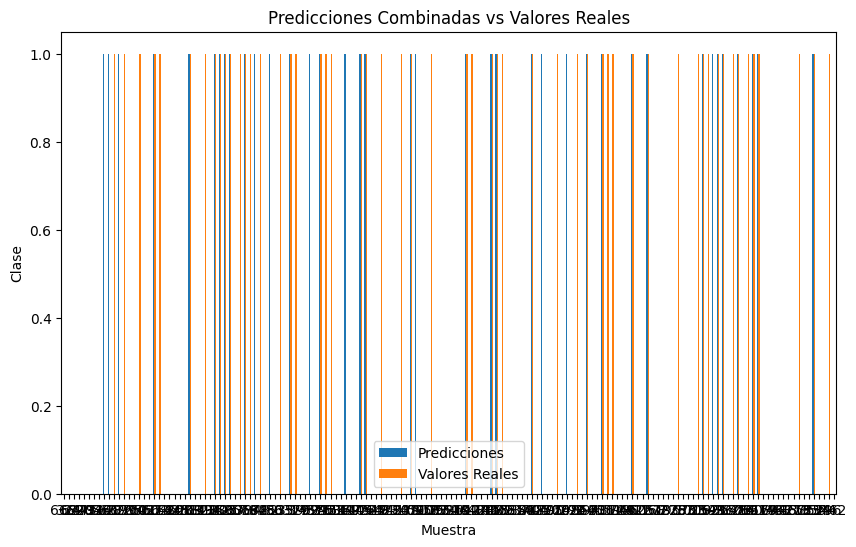

In [72]:
import matplotlib.pyplot as plt

# Crear un DataFrame con las predicciones combinadas y los valores reales
results = pd.DataFrame({'Predicciones': combined_predictions, 'Valores Reales': y_test})

# Graficar las predicciones combinadas y los valores reales
results.plot(kind='bar', figsize=(10, 6))
plt.title('Predicciones Combinadas vs Valores Reales')
plt.xlabel('Muestra')
plt.ylabel('Clase')
plt.xticks(rotation=0)
plt.legend()
plt.show()
